In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot

pd.options.plotting.backend = "plotly"

In [41]:
def plot_probes(exp_path,dict_studies_l,variables=["U","V","uu","vv","uv"],axis_l=["Y"],txt=False):
  txt_exp = ""
  txt_cfd = ""
  txt_tot = ""
  df_save = pd.DataFrame()
  Ub = 0.9744
  Dc = 0.140
  operations = {
    "U":[1/Ub],
    "V":[1/Ub],
    "uu":[5/Ub**2],
    "vv":[5/Ub**2],
    "uv":[16/Ub**2]
  }
  axis_dict = {
    "Y":"H",
    "Z":"V"
  }
  cfd_var_dict = {
    "U":"Vel_avg_x", 
    "V":"Vel_avg_y",
    "uu":"UU_avg", 
    "vv":"VV_avg",
    "uv":"UV_avg"
  }

  for var_name in variables:
    for axis in axis_l:
      fig,ax = plt.subplots()
      axis_cfd = var_name.lower() #axis name is lowercase in profile
      for j in range(len(dict_studies_l)):
        case = dict_studies_l[j]
        profiles_path = case["profile_path"]
        iter = case["iter"]
        leg_case = case["name"]
        color = case["color"]
        for i in range(1,5):
          name = "Probe{}{}.csv".format(i,axis)
          exp_data = pd.read_csv(exp_path.joinpath(name),sep=";",decimal=",")
          profile_name = "{}p6D{}_{}.csv".format(i,axis_dict[axis],iter)
          data = pd.read_csv(profiles_path.joinpath(profile_name))
          data.columns = [col.replace(' ','') for col in data.columns]
          fact = operations[var_name]
          if "uu" == var_name:
            data["UU_avg"] = data["UU_avg"] + data["U_squared"] - data["Vel_avg_x"]**2
          if "vv" == var_name:
            data["VV_avg"] = data["VV_avg"] + data["V_squared"] - data["Vel_avg_y"]**2
          if "uv" == var_name:
            data["UV_avg"] = data["UV_avg"] + data["UV_cov"] - data["Vel_avg_x"]*data["Vel_avg_y"]
          data["op"] = fact*data[cfd_var_dict[var_name]] + float(i) + 0.6
          exp_data["op"] = fact*exp_data[var_name] + float(i) + 0.6
          name_exp_col = "Exp_Probe{}{}_{}".format(i,axis,var_name.lower())
          name_cfd_col = "CFD_{}{}_{}".format(i,axis,var_name.lower())
          #df_save[name_exp_col+"_x"] = exp_data["op"]
          #df_save[name_exp_col+"_y"] = exp_data["y"]/(1000*Dc)
          df_save[name_cfd_col+"_x"] = data["op"]
          df_save[name_cfd_col+"_y"] = data["y"]/Dc
          
          if i == 1:
            ax.plot(data["op"],data["y"]/Dc,c=color,label=leg_case)
            txt_cfd += "\\addplot+[{},thick,solid,no marks] table[x={},y={},col sep=comma]{{Graphs/TJunction/TJunction_graphs_HTLES.csv}};\n\\addlegendentry{{HTLES}};\n".format(color,name_cfd_col+"_x",name_cfd_col+"_y")
            if j == 0:
              ax.plot(exp_data["op"],exp_data["y"]/(1000*Dc),c="orange",marker="o",label="Experiment")
              txt_exp += "\\addplot+[only marks, black,thick,mark options={{scale=\ScaleTJ}},mark=*] table[x={},y={},col sep=comma]{{Graphs/TJunction/TJunction_graphs_HTLES.csv}};\n\\addlegendentry{{Experiment}};\n".format(name_exp_col+"_x",name_exp_col+"_y")
              ax.set_title(var_name)
          else:
            ax.plot(data["op"],data["y"]/Dc,c=color)
            txt_cfd += "\\addplot+[{},thick,solid,no marks,forget plot] table[x={},y={},col sep=comma]{{Graphs/TJunction/TJunction_graphs_HTLES.csv}};\n".format(color,name_cfd_col+"_x",name_cfd_col+"_y")
            if j == 0:
              ax.plot(exp_data["op"],exp_data["y"]/(1000*Dc),c="orange",marker="o")
              txt_exp += "\\addplot+[only marks, black,thick,mark options={{scale=\ScaleTJ}},mark=*,forget plot] table[x={},y={},col sep=comma]{{Graphs/TJunction/TJunction_graphs_HTLES.csv}};\n".format(name_exp_col+"_x",name_exp_col+"_y")
      ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    txt_tot+= txt_cfd+"\n\n"
    txt_exp = ""
    txt_cfd = ""
  if txt:
    print(txt_tot)
  return df_save


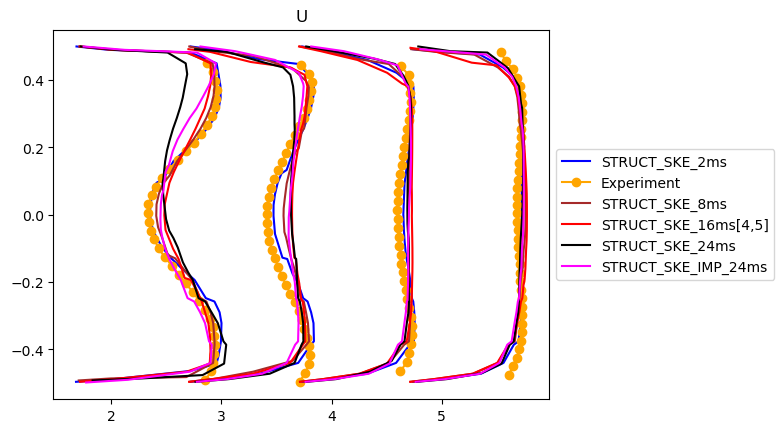

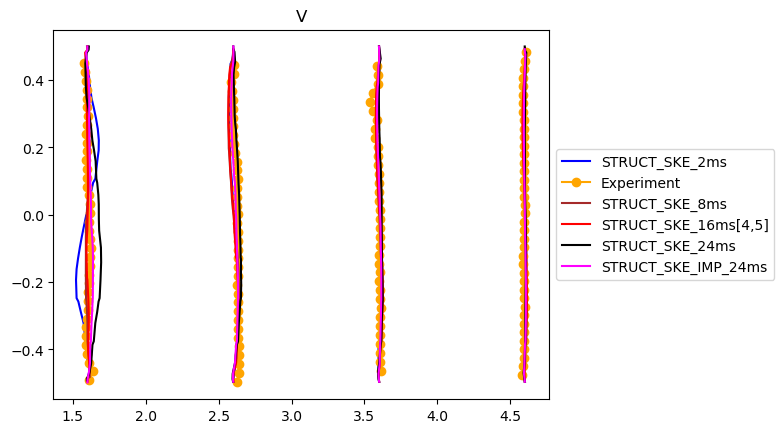

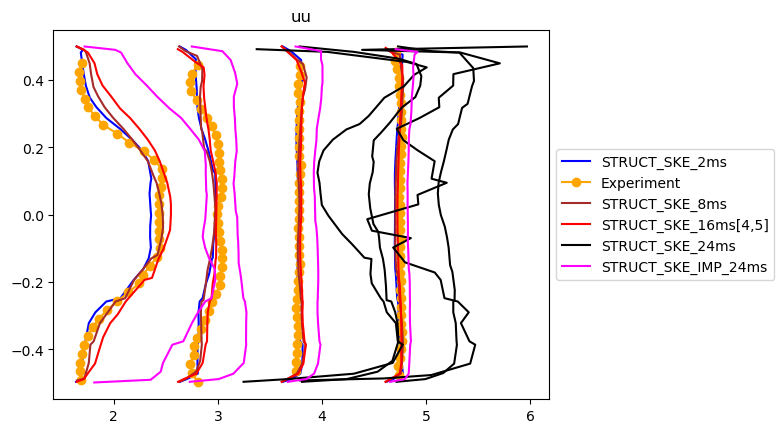

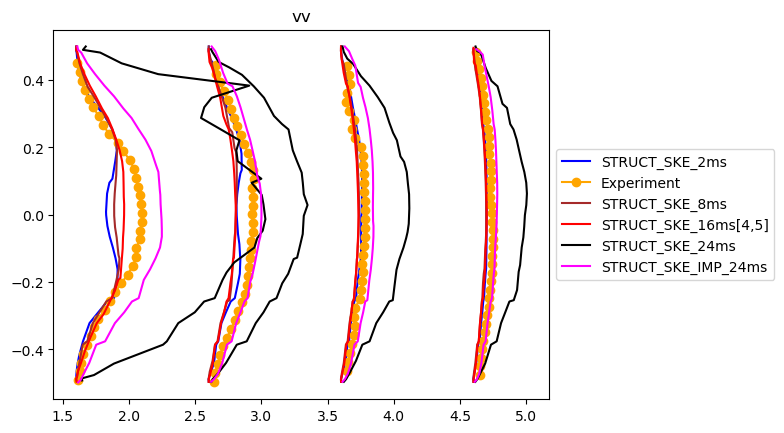

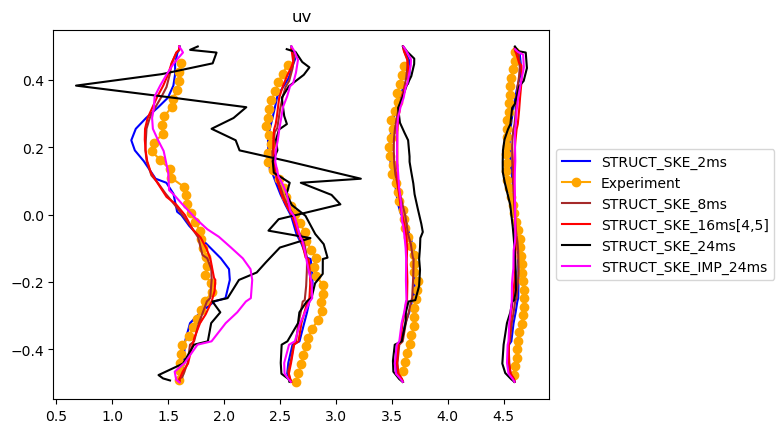

In [50]:
exp_path = Path("/home/juleslecoustre/Documents/TJunction/")

HTLES_1ms = {
    "profile_path":Path("/media/juleslecoustre/Jules/TJunction/HTLES/HTLES_1ms/profiles/"),
    "iter":"78000",
    "name":"HTLES_1ms",
    "color":"black"
}
HTLES_2ms = {
    "profile_path":Path("/media/juleslecoustre/Jules/TJunction/HTLES/HTLES_2ms/profiles/"),
    "iter":"39000",
    "name":"HTLES_2ms",
    "color":"blue"
}
HTLES_4ms = {
    "profile_path":Path("/media/juleslecoustre/Jules/TJunction/HTLES/HTLES_4ms/profiles/"),
    "iter":"19500",
    "name":"HTLES_4ms",
    "color":"green"
}
HTLES_8ms = {
    "profile_path":Path("/media/juleslecoustre/Jules/TJunction/HTLES/HTLES_8ms/profiles/"),
    "iter":"9000",
    "name":"HTLES_8ms",
    "color":"red"
}

HTLES_16ms = {
    "profile_path":Path("/media/juleslecoustre/Jules/TJunction/HTLES/HTLES_16ms/profiles/"),
    "iter":"4324",
    "name":"HTLES_16ms_CFL[4,5]",
    "color":"red"
}

HTLES_24ms = {
    "profile_path":Path("/media/juleslecoustre/Jules/TJunction/HTLES/HTLES_24ms/profiles/"),
    "iter":"3250",
    "name":"HTLES_24ms_CFL",
    "color":"brown"
}

STRUCT_1ms = {
    "profile_path":Path("/media/juleslecoustre/Jules/TJunction/STRUCT_Cubic/STRUCT_1ms/profiles/"),
    "iter":"78000",
    "name":"STRUCT_1ms",
    "color":"black"
}
STRUCT_2ms = {
    "profile_path":Path("/media/juleslecoustre/Jules/TJunction/STRUCT_Cubic/STRUCT_2ms/profiles/"),
    "iter":"39000",
    "name":"STRUCT_2ms",
    "color":"blue"
}
STRUCT_4ms = {
    "profile_path":Path("/media/juleslecoustre/Jules/TJunction/STRUCT_Cubic/STRUCT_4ms/profiles/"),
    "iter":"19500",
    "name":"STRUCT_4ms",
    "color":"green"
}
STRUCT_8ms = {
    "profile_path":Path("/media/juleslecoustre/Jules/TJunction/STRUCT_Cubic/STRUCT_8ms/profiles/"),
    "iter":"9000",
    "name":"STRUCT_8ms",
    "color":"red"
}

STRUCT_16ms = {
    "profile_path":Path("/media/juleslecoustre/Jules/TJunction/STRUCT_Cubic/STRUCT_16ms/profiles/"),
    "iter":"4324",
    "name":"STRUCT_16ms[4,5]",
    "color":"red"
}

STRUCT_QUAD_2ms = {
    "profile_path":Path("/media/juleslecoustre/Jules/TJunction/STRUCT_QUAD/STRUCT_QUAD_2ms/profiles/"),
    "iter":"39000",
    "name":"STRUCT_QUAD_2ms",
    "color":"blue"
}
STRUCT_QUAD_4ms = {
    "profile_path":Path("/media/juleslecoustre/Jules/TJunction/STRUCT_QUAD/STRUCT_QUAD_4ms/profiles/"),
    "iter":"19500",
    "name":"STRUCT_QUAD_4ms",
    "color":"green"
}
STRUCT_QUAD_8ms = {
    "profile_path":Path("/media/juleslecoustre/Jules/TJunction/STRUCT_QUAD/STRUCT_QUAD_8ms/profiles/"),
    "iter":"9000",
    "name":"STRUCT_QUAD_8ms",
    "color":"brown"
}

STRUCT_QUAD_16ms = {
    "profile_path":Path("/media/juleslecoustre/Jules/TJunction/STRUCT_QUAD/STRUCT_QUAD_16ms/profiles/"),
    "iter":"4324",
    "name":"STRUCT_QUAD_16ms[4,5]",
    "color":"red"
}

STRUCT_QUAD_24ms = {
    "profile_path":Path("/media/juleslecoustre/Jules/TJunction/STRUCT_QUAD/STRUCT_QUAD_24ms/profiles/"),
    "iter":"3250",
    "name":"STRUCT_QUAD_24ms",
    "color":"black"
}


STRUCT_SKE_2ms = {
    "profile_path":Path("/media/juleslecoustre/Jules/TJunction/STRUCT_SKE/STRUCT_SKE_2ms/profiles/"),
    "iter":"39000",
    "name":"STRUCT_SKE_2ms",
    "color":"blue"
}
STRUCT_SKE_4ms = {
    "profile_path":Path("/media/juleslecoustre/Jules/TJunction/STRUCT_SKE/STRUCT_SKE_4ms/profiles/"),
    "iter":"19500",
    "name":"STRUCT_SKE_4ms",
    "color":"green"
}
STRUCT_SKE_8ms = {
    "profile_path":Path("/media/juleslecoustre/Jules/TJunction/STRUCT_SKE/STRUCT_SKE_8ms/profiles/"),
    "iter":"9000",
    "name":"STRUCT_SKE_8ms",
    "color":"brown"
}

STRUCT_SKE_16ms = {
    "profile_path":Path("/media/juleslecoustre/Jules/TJunction/STRUCT_SKE/STRUCT_SKE_16ms/profiles/"),
    "iter":"4324",
    "name":"STRUCT_SKE_16ms[4,5]",
    "color":"red"
}

STRUCT_SKE_24ms = {
    "profile_path":Path("/media/juleslecoustre/Jules/TJunction/STRUCT_SKE/STRUCT_SKE_24ms/profiles/"),
    "iter":"3250",
    "name":"STRUCT_SKE_24ms",
    "color":"black"
}
STRUCT_SKE_24ms_IMP = {
    "profile_path":Path("/media/juleslecoustre/Jules/TJunction/STRUCT_SKE/STRUCT_SKE_IMP_24ms/profiles/"),
    "iter":"3250",
    "name":"STRUCT_SKE_IMP_24ms",
    "color":"magenta"
}

Htles_L = [HTLES_1ms,HTLES_2ms,HTLES_4ms,HTLES_16ms,HTLES_24ms]
Struct_l = [STRUCT_2ms,STRUCT_4ms,STRUCT_8ms]
Struct_quad_l = [STRUCT_QUAD_2ms,STRUCT_QUAD_8ms,STRUCT_QUAD_16ms,STRUCT_QUAD_24ms]
Struct_ske_l = [STRUCT_SKE_2ms,STRUCT_SKE_8ms,STRUCT_SKE_16ms,STRUCT_SKE_24ms,STRUCT_SKE_24ms_IMP]
dict_studies_l= Struct_ske_l

df_s = plot_probes(exp_path,dict_studies_l,variables=["U","V","uu","vv","uv"],txt=False)
#df_s = df_s.dropna()
#df_s.to_csv('TJunction_graphs_HTLES.csv')

In [145]:
df_cold = pd.read_csv("hot_inletT.csv")

In [146]:
df_cold["r"] = (df_cold["X"]**2+df_cold["Y"]**2)**0.5

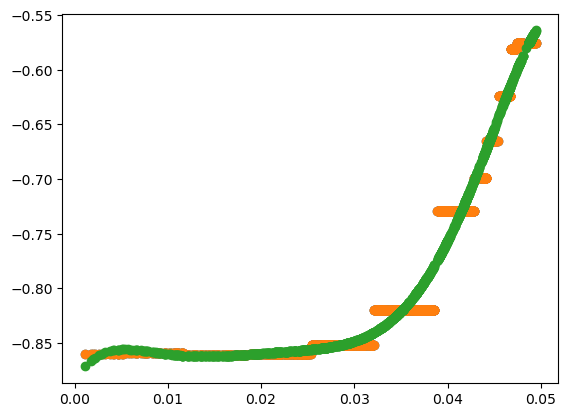

In [155]:
plt.scatter(df_cold["r"] ,df_cold["W"])
x = df_cold["r"].values
y = df_cold["W"].values

poly_coeffs = np.polyfit(x, y, deg=6)
interpolated_y = np.polyval(poly_coeffs, x)
plt.scatter(x,y)
plt.scatter(x,[f(a) for a in x])

In [153]:
print(poly_coeffs)
txt = ""
for i in range(len(poly_coeffs)):
  coef = poly_coeffs[i]
  if coef < 0: 
    txt += "-" + str(abs(coef)) + "*pow(x,{}) ".format(len(poly_coeffs)-i-1)
  else:
    txt += "+" + str(abs(coef)) + "*pow(x,{}) ".format(len(poly_coeffs)-i-1)
print(txt)

[-9.99276654e+08  1.43313358e+08 -7.68838194e+06  1.98711309e+05
 -2.53835204e+03  1.42968756e+01 -8.84461616e-01]
-999276654.1539232*pow(x,6) +143313358.19011483*pow(x,5) -7688381.936665353*pow(x,4) +198711.30852557687*pow(x,3) -2538.352040458589*pow(x,2) +14.296875569227506*pow(x,1) -0.8844616155328978*pow(x,0) 


In [154]:
def f(x):
  return -999276654.1539232*pow(x,6) +143313358.19011483*pow(x,5) -7688381.936665353*pow(x,4) +198711.30852557687*pow(x,3) -2538.352040458589*pow(x,2) +14.296875569227506*pow(x,1) -0.8844616155328978